# PYTHON PROGRAMMING


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## 실습 1. CCTV_in_Seoul.csv 파일을 pandas 로 읽어오세요.
### encoding='utf-8' 옵션을 넣습니다.

In [3]:
CCTV_Seoul = pd.read_csv('CCTV_in_Seoul.csv')

In [5]:
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


## 실습 2. 컬럼 중 "기관명" 컬럼명을 "구별" 로 이름을 바꾸세요.

In [7]:
CCTV_Seoul.rename( columns={'기관명':'구별'} , inplace=True)

In [8]:
CCTV_Seoul.head(2)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377


In [10]:
CCTV_Seoul.loc[  CCTV_Seoul['소계'] == CCTV_Seoul['소계'].min() ,  ]

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386


## 실습 3. population_in_Seoul.xls 파일을 읽으세요. 
### encoding='utf-8' 옵션을 넣습니다.

In [11]:
pop_Seoul = pd.read_excel('population_in_Seoul.xls')

In [12]:
pop_Seoul.head(2)

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자


## 실습 4.population_in_Seoul.xls 파일을 읽으세요.
### header 는 3번째 row 로 사용할 것입니다. 따라서 header = 2  로 셋팅하세요.
### 엑셀파일의 컬럼은  B, D, G, J, N 만 사용할 것입니다.
### encoding='utf-8' 옵션을 넣습니다.

In [13]:
pop_Seoul = pd.read_excel('population_in_Seoul.xls',
                         header=2,
                         usecols='B, D, G, J, N',
                         encoding='utf-8')

In [14]:
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


## 실습 5-1. pop_Seoul 의 컬럼명을 모두 출력하세요.

In [15]:
pop_Seoul.columns

Index(['자치구', '계', '계.1', '계.2', '65세이상고령자'], dtype='object')

## 실습 5-2. 컬럼명을 다음처럼 바꿉니다.
### 0번째는 '구별' , 1번째는 '인구수', 2번쨰는 '한국인', 3번째는 '외국인', 4번째는 '고령자'  로 rename

In [16]:
pop_Seoul.rename(columns={'자치구': '구별' , '계':'인구수','계.1': '한국인',
                         '계.2':'외국인', '65세이상고령자':'고령자' }, 
                inplace = True)

In [17]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [19]:
pop_Seoul.drop(0, axis=0, inplace = True)

In [20]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


## 실습 6. CCTV 갯수가 가장 많은 순부터 적은 순으로 정렬한 후, 상위 20개만 화면에 보여주세요.
### sort_values 함수 사용하세요. 

In [23]:
CCTV_Seoul.sort_values(by = '소계', ascending=False ).head(10)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398
6,구로구,1561,1142,173,246,323
4,관악구,1496,846,260,390,613
16,성북구,1464,1009,78,360,204
10,동대문구,1294,1070,23,198,579
8,노원구,1265,542,57,451,516


## 실습 7. 최근 3년간 CCTV 증가율을 계산하여, dataframe 에 '최근증가율' 컬럼을 추가하세요.
### 증가율 계산  :  (2016 + 2015 + 2014) / 2013이전 * 100

In [24]:
CCTV_Seoul.head(3)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204


In [29]:
CCTV_Seoul['최근증가율'] =  (CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] + CCTV_Seoul['2014년']) / CCTV_Seoul['2013년도 이전'] * 100

In [30]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252
3,강서구,884,388,258,184,81,134.793814
4,관악구,1496,846,260,390,613,149.290780


## 실습 8. 최근 3년간 CCTV 증가율이 가장 높은 순으로 5개의 구를 찾으세요.

In [31]:
CCTV_Seoul.sort_values(by = '최근증가율', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


## 실습 9. 서울시의 인구 데이터 중, NaN이 있는지 확인하고, NaN이 있으면 해당 row를 삭제하세요.

In [32]:
pop_Seoul.isnull().sum()

구별     1
인구수    1
한국인    1
외국인    1
고령자    1
dtype: int64

In [35]:
pop_Seoul.dropna(axis = 0, inplace = True)

In [36]:
pop_Seoul.isnull().sum()

구별     0
인구수    0
한국인    0
외국인    0
고령자    0
dtype: int64

## 실습 10. '외국인비율' 과 '고령자비율' 두개의 컬럼을 추가하세요.
### 외국인비율 = 외국인 수 / 인구수 * 100
### 고령자비율 = 고령자 수 / 인구수 * 100

In [37]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100

In [38]:
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100

In [39]:
pop_Seoul.head(2)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909


## 실습 11. 외국인 대상으로 장사를 하려 합니다. 외국인이 가장 많은 구와, 외국인비율이 가장 높은 구를 각각 5개씩 찾으세요.

In [40]:
pop_Seoul.sort_values(by='외국인', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [41]:
pop_Seoul.sort_values(by='외국인비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


## 실습 12. 고령자 대상 마케팅을 구상 중입니다. 고령자가 가장 많은 구와, 고령자비율이 가장 높은 구를 각각 5개씩 찾으세요.

In [42]:
pop_Seoul.sort_values(by='고령자', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [43]:
pop_Seoul.sort_values(by='고령자비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


## 실습 13. CCTV 데이터와 인구 데이터 합치고 분석하기


In [44]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')

In [46]:
data_result.head(2)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638


## 실습 14. data_result 에서, 다음 4개의 컬럼을 모두 버려 버립니다.
### '2013년도 이전', 2014년', '2015년', '2016년' 

In [48]:
data_result.drop(['2013년도 이전', '2014년', '2015년', '2016년'], axis = 1)

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
5,광진구,707,53.228621,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849
6,구로구,1561,64.973730,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
7,금천구,1015,100.000000,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
8,노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
9,도봉구,485,246.638655,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507


In [49]:
del data_result['2013년도 이전']

In [51]:
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']

In [52]:
data_result.to_csv('data_result.csv')

## 실습 15-1. data_result 의 인덱스를, '구별' 로 바꿔 줍니다.


In [53]:
data_result.head(2)

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638


In [55]:
data_result.set_index('구별', inplace = True)

In [56]:
data_result.head(2)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638


In [58]:
data_result.loc['금천구', '인구수']

255082.0

## 실습 15-2. 이 데이터프레임을 csv 파일로 저장합니다.
### 파일명은, CCTV_result.csv 입니다.

In [59]:
data_result.to_csv('CCTV_result.csv', sep=';', encoding='utf-8')

## 실습 16. 상관 관계 분석에 대해서 알아봅니다.
### https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D
###  상관계수는 -1부터 1까지의 값을 갖는다.1일 때 완벽한 양의 상관관계가 되고, -1일 때 완벽한 음의 상관관계가 된다. 0이라면 별다른 상관관계가 없음을 의미한다.
###  상관계수가 0.1 이하면 관계가 없고, 0.3 이하면 약한관계 입니다

## 실습 17. CCTV의 갯수와 고령자 비율의 상관관계를 분석하세요.

### np.corrcoef 함수를 이용하면 됩니다.

In [61]:
data_result[ ['소계','고령자비율'] ].corr()

,소계,고령자비율
소계,1.000000,-0.280786
고령자비율,-0.280786,1.000000


In [62]:
np.corrcoef( data_result['소계']  ,data_result['고령자비율']  )

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

## 실습 18. CCTV의 갯수와 외국인 비율의 상관관계를 분석하세요.

In [64]:
data_result[ ['소계','외국인비율']  ].corr()

,소계,외국인비율
소계,1.000000,-0.136074
외국인비율,-0.136074,1.000000


## 실습 19. CCTV의 갯수와 인구수의 상관관계를 분석하세요.

In [65]:
data_result[ ['소계','인구수']  ].corr()

,소계,인구수
소계,1.000000,0.306342
인구수,0.306342,1.000000


In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

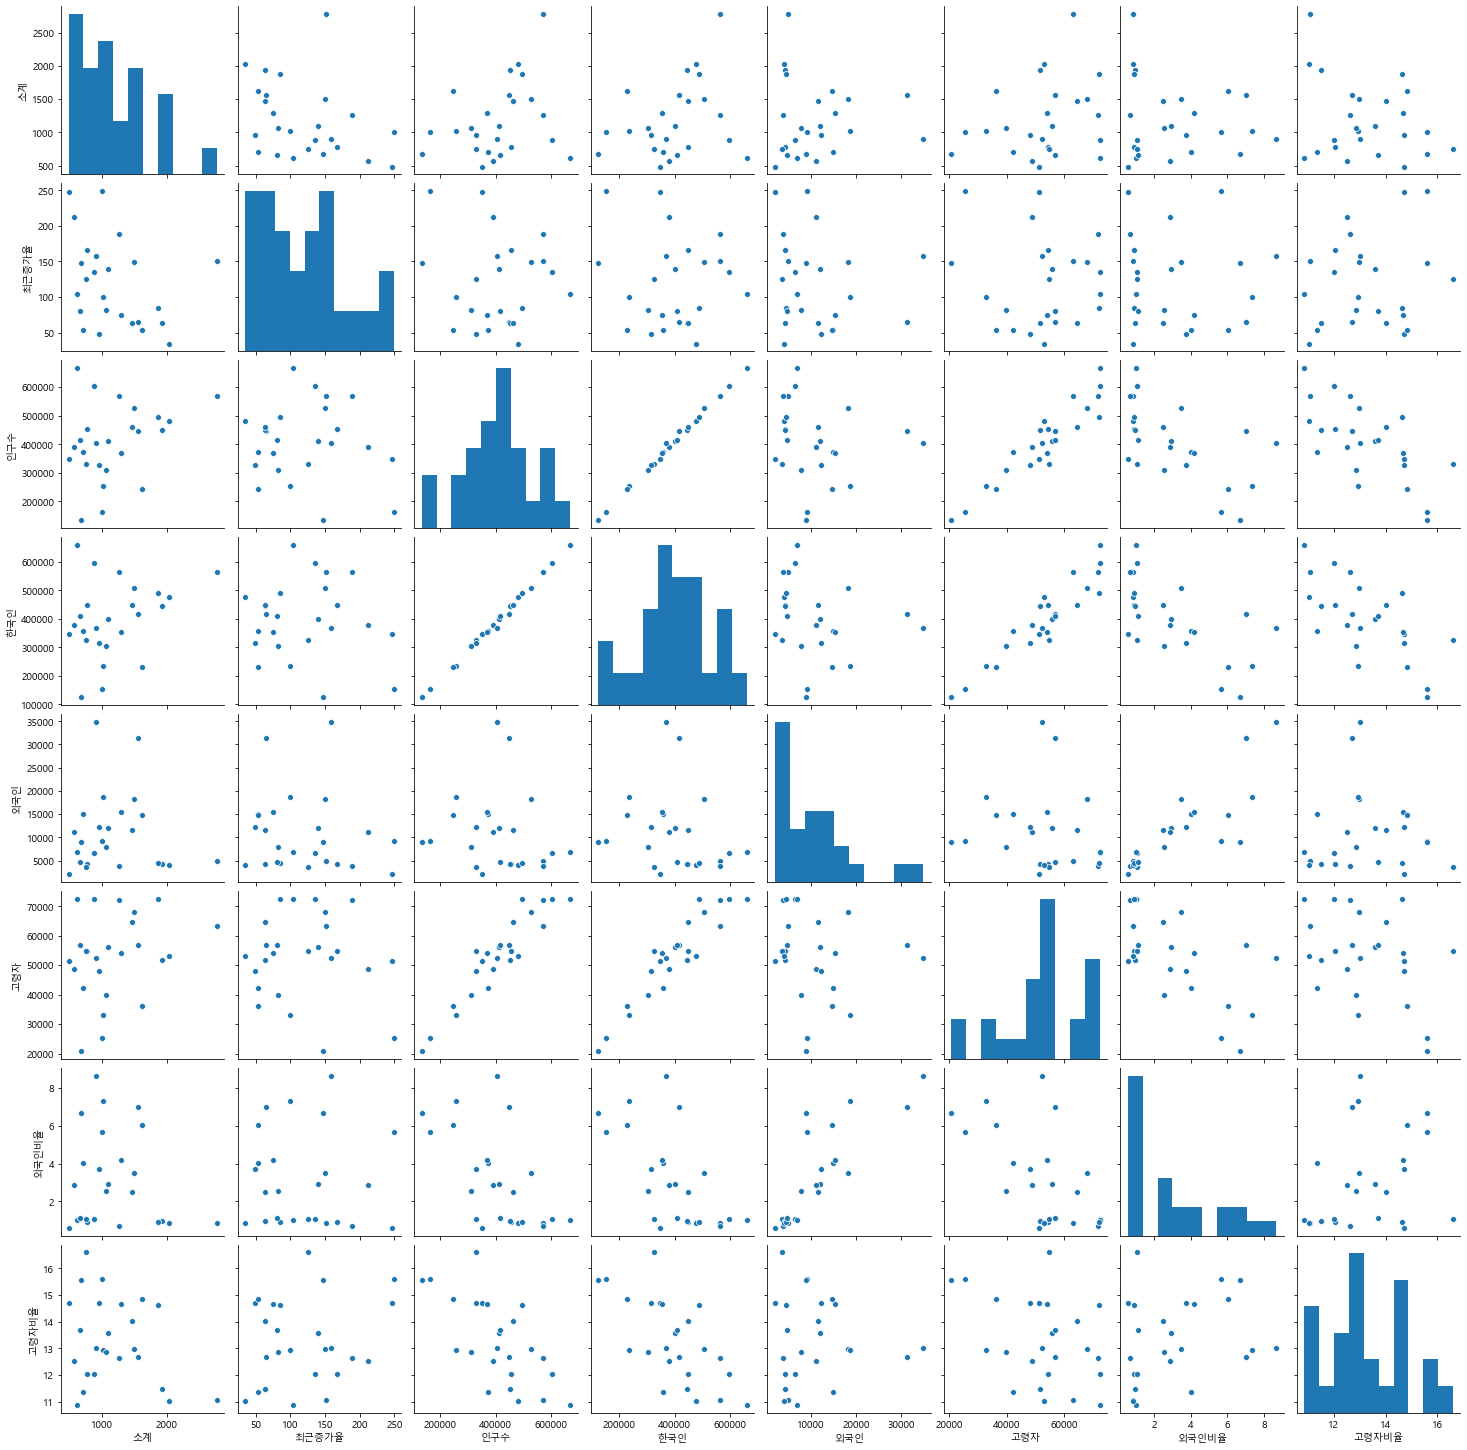

In [67]:
sb.pairplot(data_result)
plt.show()

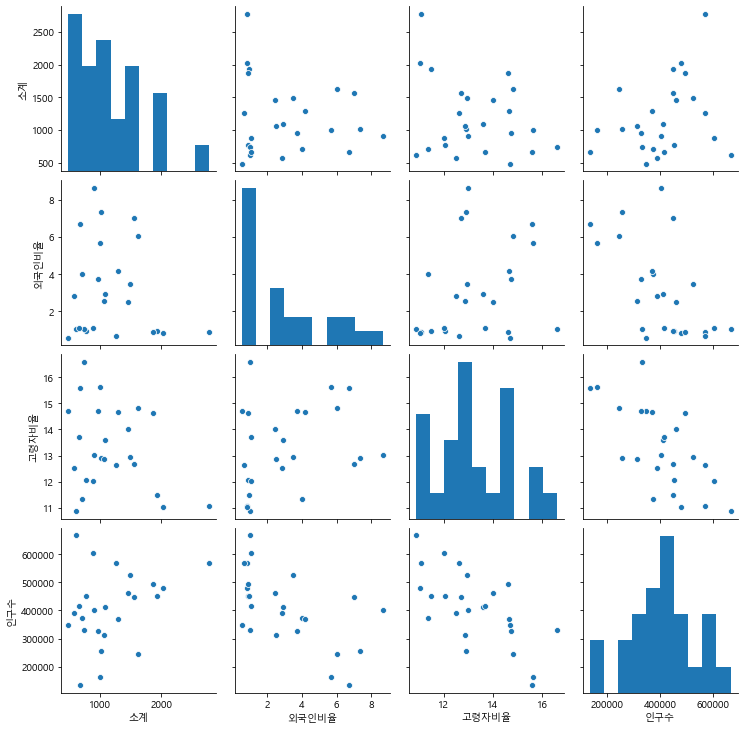

In [68]:
sb.pairplot(data_result, vars=['소계','외국인비율','고령자비율','인구수'])
plt.show()

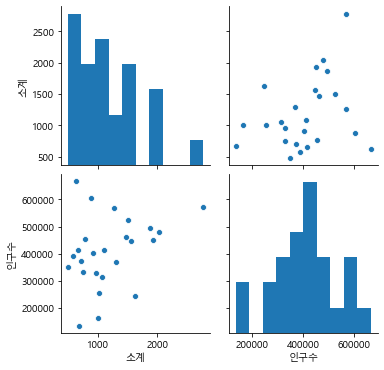

In [73]:
sb.pairplot(data_result, vars=['소계','인구수'])
plt.savefig('corr1.png', dpi = 1000)
plt.show()

## 실습 20. 각 구의 CCTV의 갯수를 bar로 나타내세요.
### pandas dataframe.plot 함수 사용

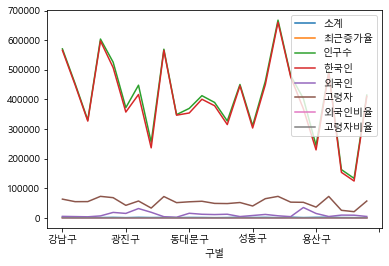

In [75]:
data_result.plot()
plt.show()

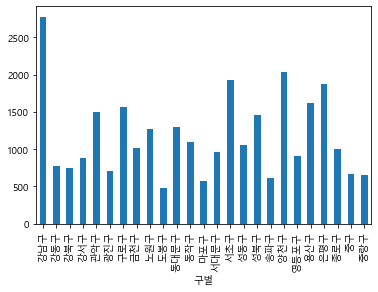

In [78]:
data_result['소계'].plot(kind = 'bar')
plt.show()

## 실습 21. 각 구의 CCTV의 갯수를, 먼저 소팅(큰순)한 후,  bar로 나타내세요.

In [79]:
data_result.sort_values(by = '소계', ascending=False)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
구로구,1561,64.973730,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
성북구,1464,63.627354,461260.0,449773.0,11487.0,64692.0,2.490353,14.025062
동대문구,1294,74.766355,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


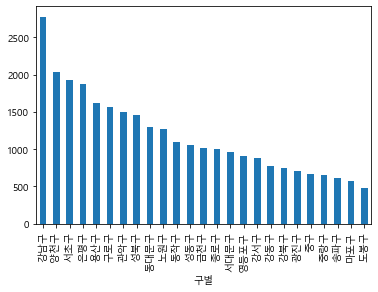

In [83]:
data_result['소계'].sort_values(ascending=False).plot(kind = 'bar')
plt.show()

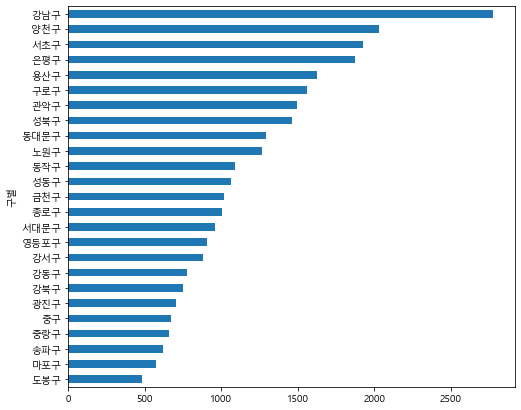

In [88]:
plt.figure(figsize=(8,7))
data_result['소계'].sort_values(ascending=True).plot(kind = 'barh')
plt.show()

## 실습 22. 인구 한명당 CCTV의 비율을 계산하고, 이를 각 구별로 CCTV비율이 얼마인지 bar로 나타내세요.

In [90]:
data_result['CCTV / 1명'] = data_result['소계'] / data_result['인구수']

In [91]:
data_result.head(1)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV / 1명
구별,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.86766,11.072217,0.004873


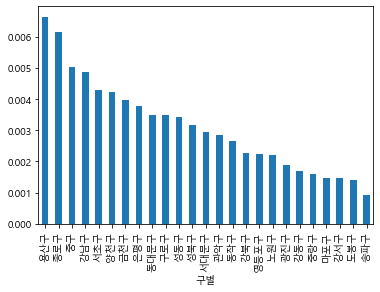

In [94]:
data_result['CCTV / 1명'].sort_values(ascending=False).plot(kind='bar')
plt.show()

## 실습 23. 인구수와 CCTV갯수가 어떤 분포인지, scatter로 나타내세요.

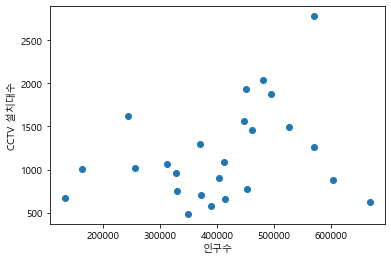

In [95]:
plt.scatter(data_result['인구수'], data_result['소계'])
plt.xlabel('인구수')
plt.ylabel('CCTV 설치대수')
plt.show()

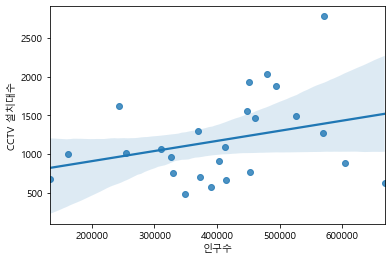

In [96]:
sb.regplot(data_result['인구수'], data_result['소계'])
plt.xlabel('인구수')
plt.ylabel('CCTV 설치대수')
plt.show()